In [1]:
import pandas as pd
df=pd.read_excel("fraud_detection_12000_rows.xlsx")
df

,transaction_amount,transaction_time,account_age_days,num_prev_transactions,is_international,is_high_risk_country,is_fraud
0,2250.37,21,1987,135,0,0,0
1,5704.53,19,1768,185,0,1,1
2,4393.30,6,1435,126,0,0,0
3,3593.96,2,957,48,1,0,1
4,940.33,4,3859,165,1,0,0
...,...,...,...,...,...,...,...
11995,32.84,15,343,44,0,0,0
11996,5242.64,11,2683,110,0,0,1
11997,1847.41,18,713,289,0,0,0
11998,5631.84,23,3080,184,0,0,1


In [2]:
df.head()

,transaction_amount,transaction_time,account_age_days,num_prev_transactions,is_international,is_high_risk_country,is_fraud
0,2250.37,21,1987,135,0,0,0
1,5704.53,19,1768,185,0,1,1
2,4393.30,6,1435,126,0,0,0
3,3593.96,2,957,48,1,0,1
4,940.33,4,3859,165,1,0,0


In [3]:
df.tail()

,transaction_amount,transaction_time,account_age_days,num_prev_transactions,is_international,is_high_risk_country,is_fraud
11995,32.84,15,343,44,0,0,0
11996,5242.64,11,2683,110,0,0,1
11997,1847.41,18,713,289,0,0,0
11998,5631.84,23,3080,184,0,0,1
11999,1905.09,21,2624,234,0,0,0


In [4]:
df.shape

(12000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_amount     12000 non-null  float64
 1   transaction_time       12000 non-null  int64  
 2   account_age_days       12000 non-null  int64  
 3   num_prev_transactions  12000 non-null  int64  
 4   is_international       12000 non-null  int64  
 5   is_high_risk_country   12000 non-null  int64  
 6   is_fraud               12000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 656.4 KB


In [6]:
df.describe()

,transaction_amount,transaction_time,account_age_days,num_prev_transactions,is_international,is_high_risk_country,is_fraud
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,2978.789242,11.505000,2006.147333,149.312417,0.181417,0.076750,0.298000
std,1728.120202,6.909616,1155.883944,86.993368,0.385379,0.266205,0.457399
min,5.070000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1485.375000,6.000000,998.000000,74.000000,0.000000,0.000000,0.000000
50%,2966.030000,12.000000,2019.500000,149.000000,0.000000,0.000000,0.000000
75%,4468.172500,17.000000,3000.000000,225.000000,0.000000,0.000000,1.000000
max,5998.310000,23.000000,3999.000000,299.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

transaction_amount       0
transaction_time         0
account_age_days         0
num_prev_transactions    0
is_international         0
is_high_risk_country     0
is_fraud                 0
dtype: int64

In [8]:
df['is_fraud'].unique()

array([0, 1])

Visulization

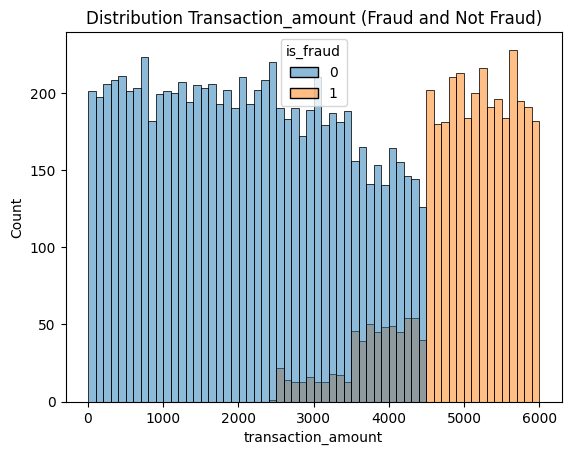

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x="transaction_amount",hue="is_fraud",bins=60,data=df)
plt.title("Distribution Transaction_amount (Fraud and Not Fraud)")
plt.show()

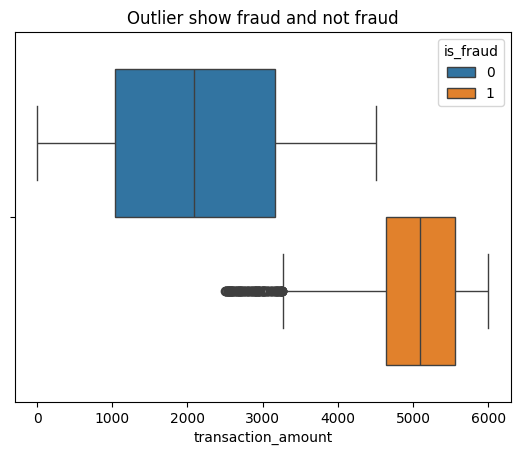

In [18]:
sns.boxplot(x="transaction_amount",hue="is_fraud",data=df)
plt.title("Outlier show fraud and not fraud")
plt.show()

outlier solve

In [22]:
q1 = df['transaction_amount'].quantile(0.25)
q3 = df['transaction_amount'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -2988.821250000001
Upper Bound: 8942.368750000001


In [37]:
low = df['transaction_amount'].quantile(0.01)
high = df['transaction_amount'].quantile(0.99)

df_clip = df[
    (df['transaction_amount'] >= low) &
    (df['transaction_amount'] <= high)
]

print(df.shape[0], df_clip.shape[0])


12000 11760


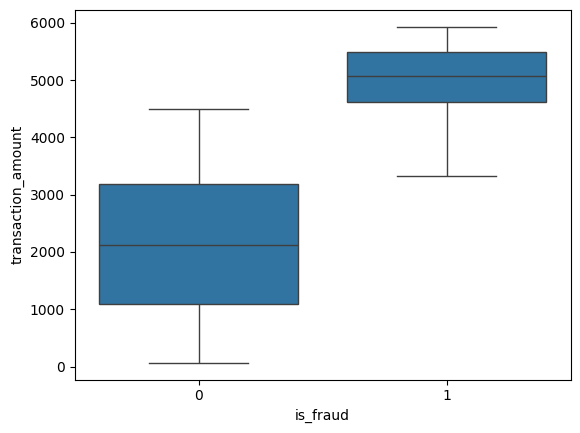

In [ ]:
sns.boxplot(
    x='is_fraud',
    y='transaction_amount',
    data=df_clip,
    showfliers=False,
)
plt.show()

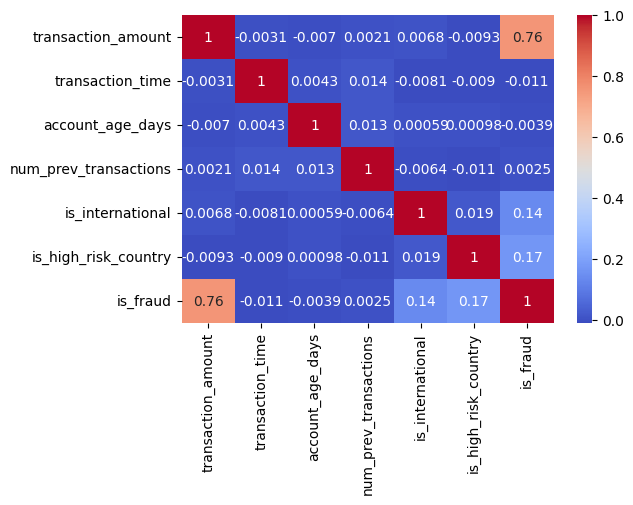

In [50]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

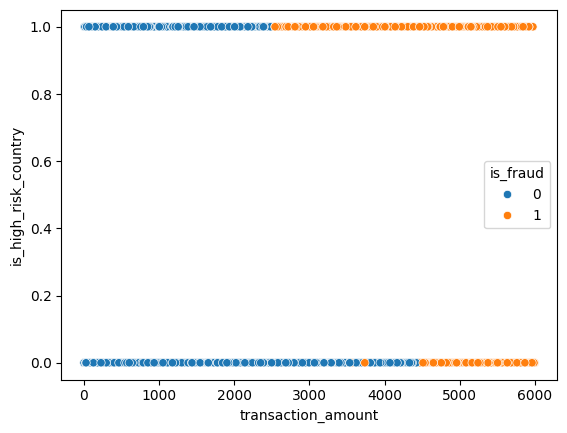

In [56]:
sns.scatterplot(
    x="transaction_amount",
    y="is_high_risk_country",
    hue="is_fraud",
    data=df,
)
plt.show()


In [57]:
X=df.drop("is_fraud",axis=1)
y=df['is_fraud']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=200,
    criterion="gini",
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    bootstrap=True,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [62]:
y_pred=model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6749,    2],
       [   8, 2841]])

In [74]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred)

0.9992965177629265

In [75]:
recall_score(y_test,y_pred)

0.9971919971919971

In [76]:
f1_score(y_test,y_pred)

0.9982431482782853

In [79]:
from joblib import dump
dump(model,"fraud_model.joblib")

['fraud_model.joblib']